In [1]:
import os
import json
import gzip
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_DIR = os.path.abspath(os.path.join('..','data'))

In [3]:
data_file = os.path.join(DATA_DIR, '2017-02-14_2019_06_01.json.gz')

In [4]:
infile = gzip.open(data_file, 'r')

In [5]:
d = json.load(infile)

In [6]:
d['activities-heart'][15]

{'dateTime': '2017-03-01',
 'value': {'customHeartRateZones': [],
  'heartRateZones': [{'caloriesOut': 2415,
    'max': 89,
    'min': 30,
    'minutes': 1362,
    'name': 'Out of Range'},
   {'caloriesOut': 65.75625,
    'max': 125,
    'min': 89,
    'minutes': 14,
    'name': 'Fat Burn'},
   {'caloriesOut': 180.99375,
    'max': 152,
    'min': 125,
    'minutes': 12,
    'name': 'Cardio'},
   {'caloriesOut': 180.8625,
    'max': 220,
    'min': 152,
    'minutes': 11,
    'name': 'Peak'}],
  'restingHeartRate': 51}}

In [7]:
def fitbit_dict_to_dataframe(d):
    e = d['activities-heart']
    dates = []
    calories, minutes = {}, {}
    for k in ('normal','fat_burn','cardio','peak'):
        calories[k] = []
        minutes[k] = []
    heart_rates = []
    for item in e:
        f = item['value']
        if 'restingHeartRate' not in f:
            continue
        dates.append( item['dateTime'] )
        for item2, k in zip(f['heartRateZones'], ('normal','fat_burn','cardio','peak')):
            calories[k].append(item2['caloriesOut'])
            minutes[k].append(item2['minutes'])
        heart_rates.append(f['restingHeartRate'])
    all_data = {'date':dates, 'heart_rate':heart_rates}
    all_data.update({'calories_{}'.format(k): v for k, v in calories.items()})
    all_data.update({'minutes_{}'.format(k): v for k, v in minutes.items()})
    df = pd.DataFrame(all_data)
    df['date'] = pd.to_datetime(df['date'])
    return df
            

In [8]:
e = fitbit_dict_to_dataframe(d)

In [9]:
e

,date,heart_rate,calories_normal,calories_fat_burn,calories_cardio,calories_peak,minutes_normal,minutes_fat_burn,minutes_cardio,minutes_peak
0,2017-02-14,56,543.51024,127.24320,0.00000,0.00000,300,20,0,0
1,2017-02-15,50,2213.07845,347.40260,113.95115,194.86550,1254,50,9,12
2,2017-02-16,52,2576.92864,244.33024,11.72160,0.00000,1350,33,1,0
3,2017-02-17,53,2473.34842,390.58370,11.49544,0.00000,1329,55,1,0
4,2017-02-18,54,2446.46482,103.47862,0.00000,0.00000,1391,15,0,0
5,2017-02-19,54,2789.28388,188.02984,0.00000,0.00000,1374,26,0,0
6,2017-02-20,53,2465.79640,178.97332,0.00000,0.00000,1348,38,0,0
7,2017-02-21,52,2454.86624,151.13524,43.38748,294.14352,1333,26,3,18
8,2017-02-22,53,2081.00552,539.16544,51.92352,0.00000,1052,80,4,0
9,2017-02-23,53,2169.35215,1179.03850,58.62405,283.02170,1144,225,4,17


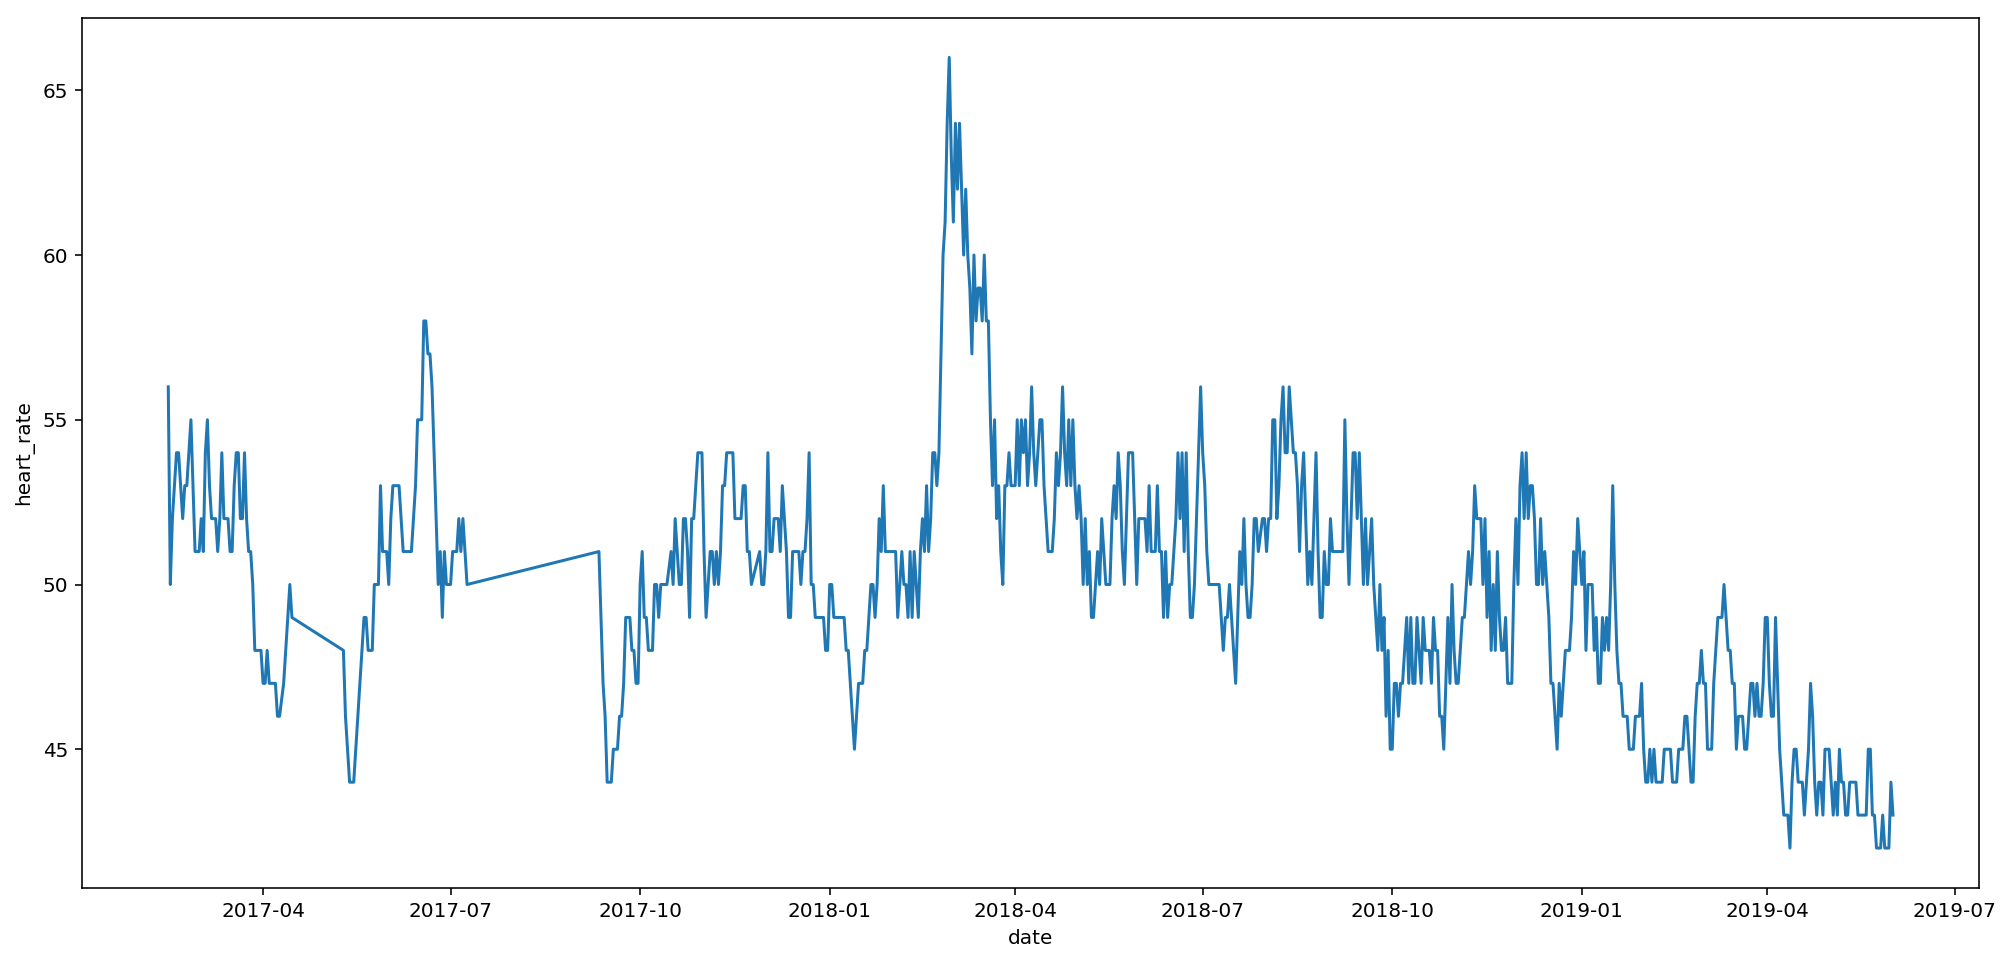

In [10]:
fig, ax = plt.subplots(figsize=(17,8))
sns.lineplot(e['date'], e['heart_rate'])

In [11]:
e['calories_total'] = e['calories_cardio'] + e['calories_fat_burn'] + e['calories_normal'] + e['calories_peak']

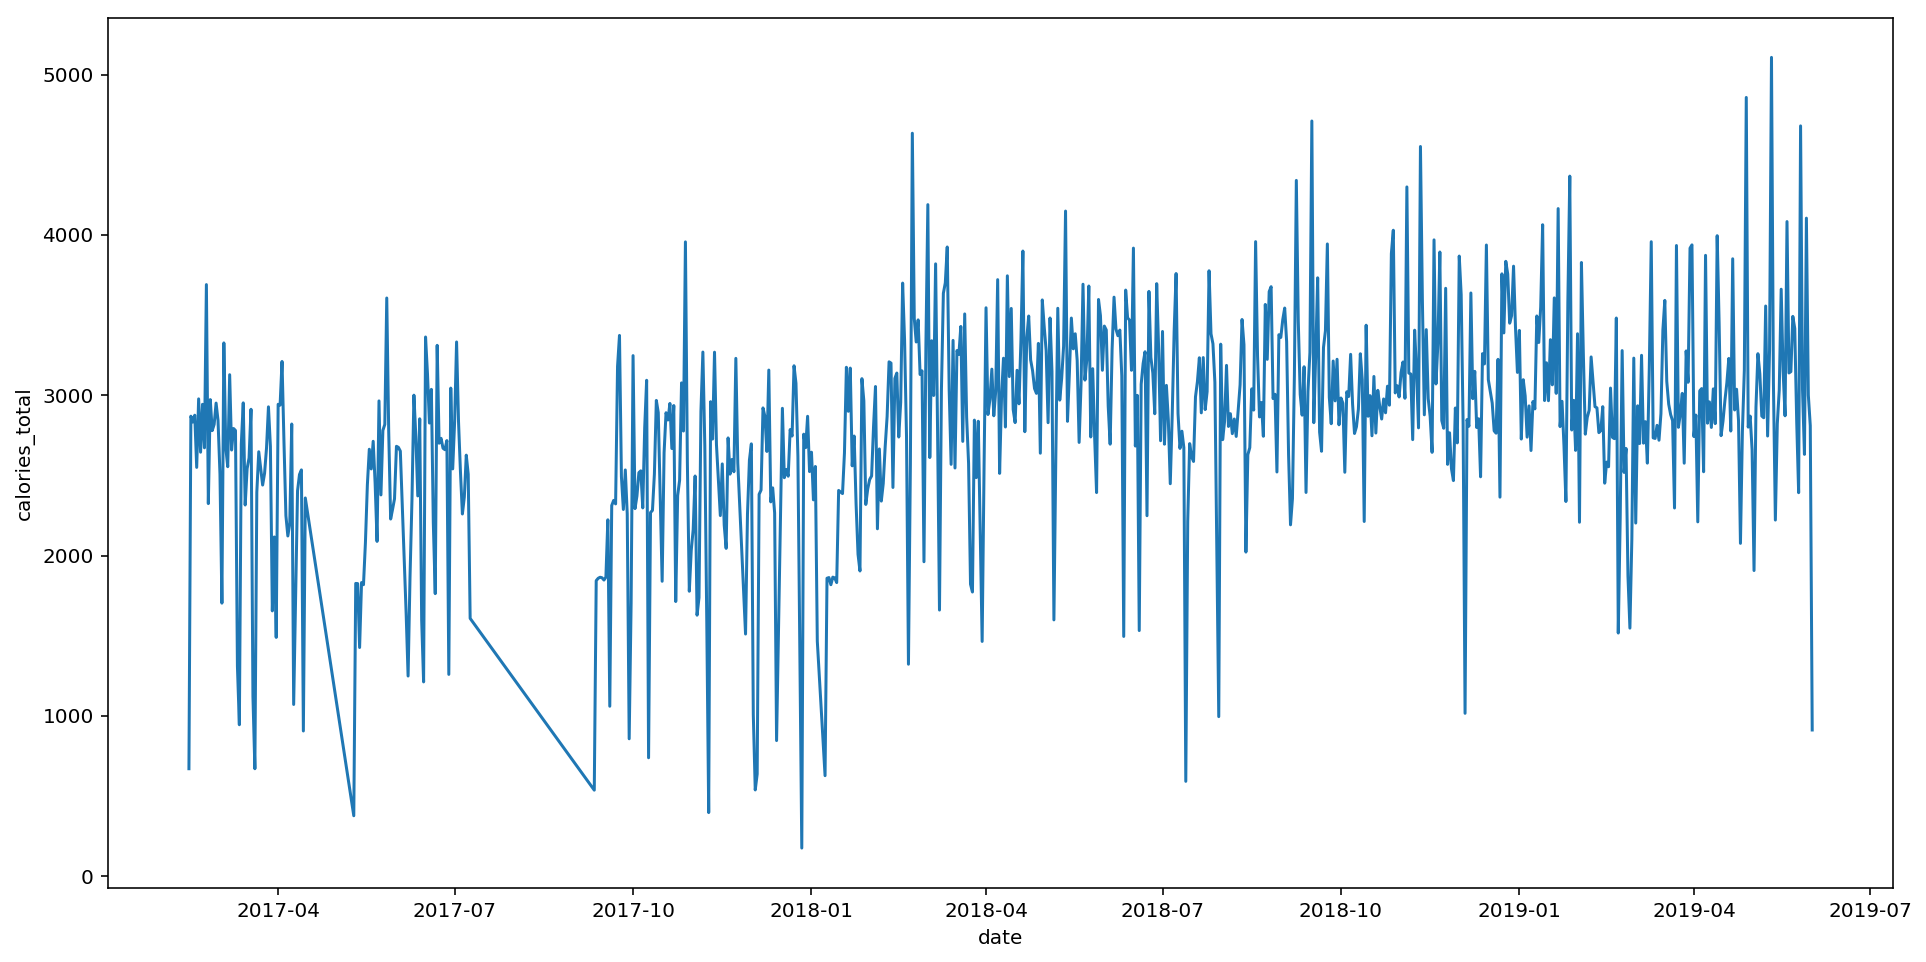

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(e['date'], e['calories_total'])

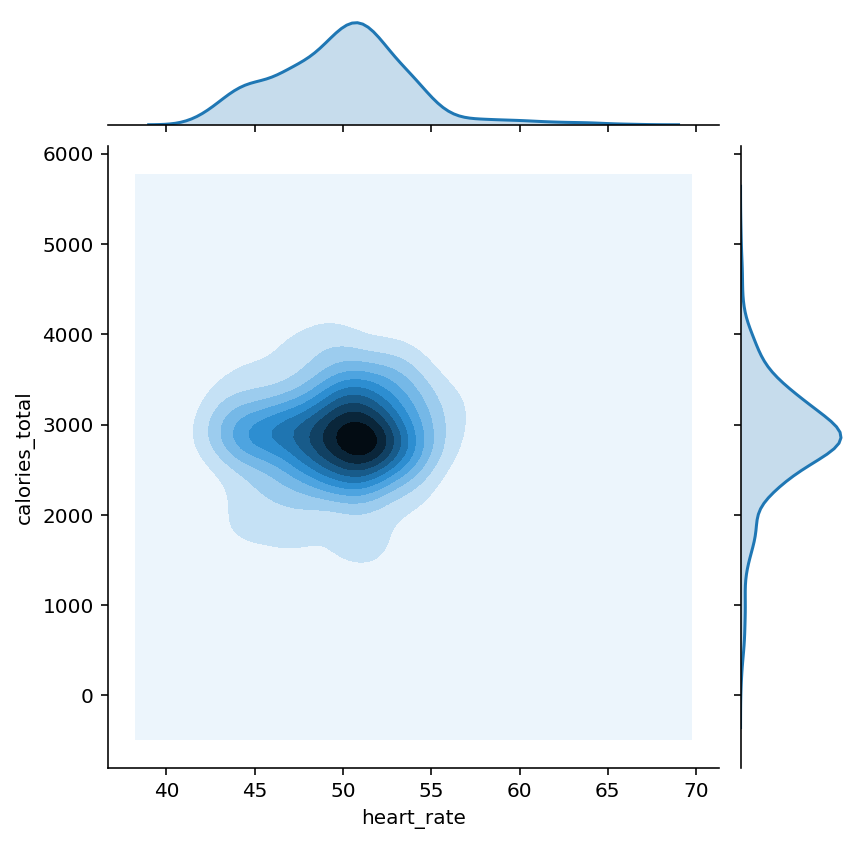

In [13]:
sns.jointplot(e['heart_rate'],e['calories_total'], kind='kde')

/Users/jon/projects/hrsync/ve/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


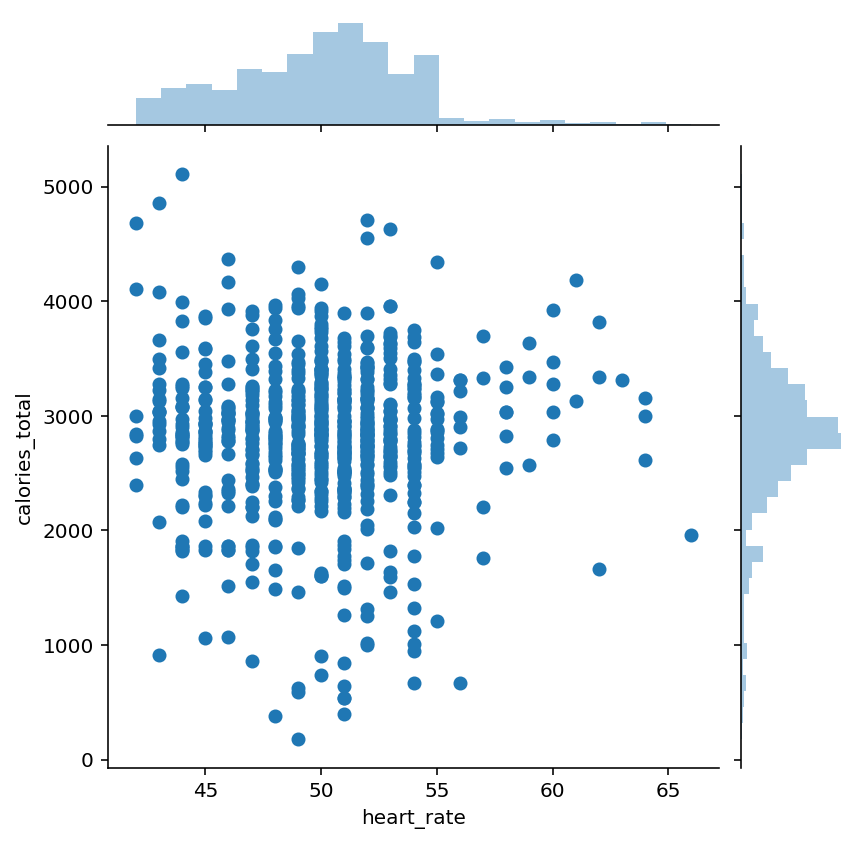

In [14]:
sns.jointplot(e['heart_rate'],e['calories_total'])